In [601]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

import matplotlib.pyplot as plt
import matplotlib as mpl

In [602]:
#데이터 불러오기
data = pd.read_excel('범죄자 교육정도.xlsx')
data

,No,자료시점,분류,분류.1,계,계.1,계.2,계.3,계.4,계.5,...,계.10,계.11,계.12,계.13,계.14,계.15,계.16,계.17,계.18,계.19
0,No,자료시점,분류,분류,계,불취학,초등학교(소계),초등학교(소계),초등학교(소계),중학교(소계),...,고등학교(소계),대학(4년미만_소계),대학(4년미만_소계),대학(4년미만_소계),대학(4년제이상_소계),대학(4년제이상_소계),대학(4년제이상_소계),대학원(소계),대학원(소계),대학원(소계)
1,No,자료시점,분류,분류,계,불취학,재중,중퇴,졸업,재중,...,졸업,재중,중퇴,졸업,재중,중퇴,졸업,재중,중퇴,졸업
2,No,자료시점,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2011년,강력범죄,강력범죄(소계),25346,152,10,295,968,483,...,6723,171,172,790,735,378,2005,NaN,NaN,NaN
4,2,2011년,강력범죄,강간,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,391,2019년,노동범죄,노동범죄,865,2,0,2,31,0,...,343,1,7,51,2,25,88,0,1,12
386,392,2019년,안보범죄,안보범죄,545,0,0,1,3,0,...,290,2,6,17,10,27,38,0,1,1
387,393,2019년,선거범죄,선거범죄,1180,2,0,6,55,0,...,373,0,0,54,1,9,158,6,1,44
388,394,2019년,병역범죄,병역범죄,11809,0,0,12,22,0,...,5998,48,176,568,536,1161,1243,57,41,79


In [603]:
#데이터 편집
data.iloc[0,3]= '분류 1'
data.rename(columns=data.iloc[0],inplace=True)
data2=data.drop([0,2],0)
data3 =data2.reset_index(drop=True)
df4=data3.fillna(0)
k=df4.drop(df4.index[0])
k.columns=['No','자료시점','분류','분류1','계','불취학','초등학교(재중)','초등학교(중퇴)','초등학교(졸업)','중학교(재중)','중학교(중퇴)','중학교(졸업)','고등학교(재중)','고등학교(중퇴)','고등학교(졸업)','4년미만대학(재중)','4년미만대학(중퇴)','4년미만대학(졸업)','4년제이상대학(재중)','4년제이상대학(중퇴)','4년제이상대학(졸업)','대학원(재중)','대학원(중퇴)','대학원(졸업)']
k

,No,자료시점,분류,분류1,계,불취학,초등학교(재중),초등학교(중퇴),초등학교(졸업),중학교(재중),...,고등학교(졸업),4년미만대학(재중),4년미만대학(중퇴),4년미만대학(졸업),4년제이상대학(재중),4년제이상대학(중퇴),4년제이상대학(졸업),대학원(재중),대학원(중퇴),대학원(졸업)
1,1,2011년,강력범죄,강력범죄(소계),25346,152,10,295,968,483,...,6723,171,172,790,735,378,2005,0,0,0
2,2,2011년,강력범죄,강간,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2011년,강력범죄,강간·강제추행,17652,89,4,181,619,300,...,4352,128,114,631,610,261,1716,0,0,0
4,4,2011년,강력범죄,강도,4890,22,3,45,138,125,...,1474,38,43,87,91,78,171,0,0,0
5,5,2011년,강력범죄,강제추행,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,391,2019년,노동범죄,노동범죄,865,2,0,2,31,0,...,343,1,7,51,2,25,88,0,1,12
384,392,2019년,안보범죄,안보범죄,545,0,0,1,3,0,...,290,2,6,17,10,27,38,0,1,1
385,393,2019년,선거범죄,선거범죄,1180,2,0,6,55,0,...,373,0,0,54,1,9,158,6,1,44
386,394,2019년,병역범죄,병역범죄,11809,0,0,12,22,0,...,5998,48,176,568,536,1161,1243,57,41,79


In [604]:
plt.rcParams['font.family'] = 'Malgun Gothic'

## 범죄 종류에 따른 범죄자 수

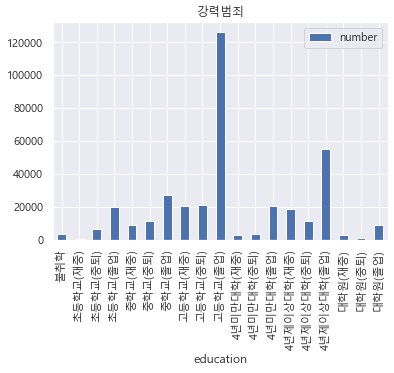

In [605]:
df5=k.query('분류=="강력범죄"')
q=df5[df5.columns[5:]]
a=q.astype(int)  #문자열 데이터를 정수형으로 바꿔줌
b=a.sum().drop_duplicates()
dfb=b.to_frame()
dfb.index.names=['education']
dfb.rename(columns={0:'number'}, inplace=True)
dfb.plot(kind='bar',title='강력범죄')

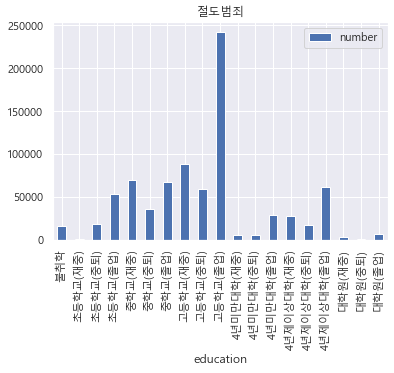

In [606]:
df6=k.query('분류=="절도범죄"')
w=df6[df6.columns[5:]]
c=w.astype(int)
d=c.sum().drop_duplicates()
dfb2=d.to_frame()
dfb2.index.names=['education']
dfb2.rename(columns={0:'number'}, inplace=True)
dfb2.plot(kind='bar',title='절도범죄')

학생들이 많음

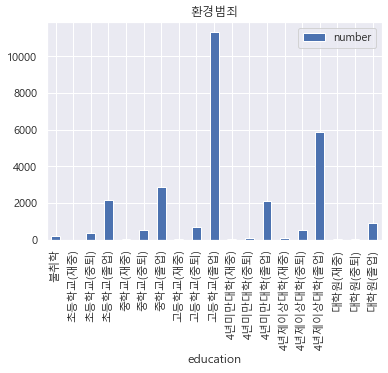

In [607]:
df7=k.query('분류=="환경범죄"')
e=df7[df7.columns[5:]]
c=e.astype(int)
d=c.sum().drop_duplicates()
dfb3=d.to_frame()
dfb3.index.names=['education']
dfb3.rename(columns={0:'number'}, inplace=True)
dfb3.plot(kind='bar',title='환경범죄')

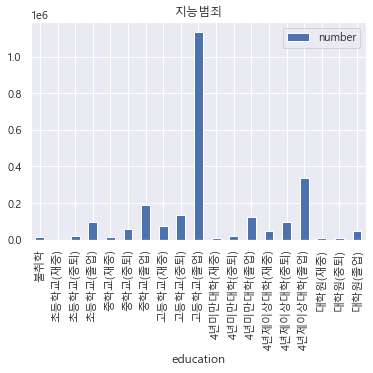

In [608]:
df8=k.query('분류=="지능범죄"')
e=df8[df8.columns[5:]]
c=e.astype(int)
d=c.sum().drop_duplicates()
dfb4=d.to_frame()
dfb4.index.names=['education']
dfb4.rename(columns={0:'number'}, inplace=True)
dfb4.plot(kind='bar',title='지능범죄')

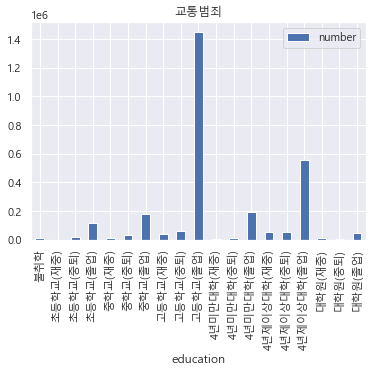

In [609]:
df9=k.query('분류=="교통범죄"')
e=df9[df9.columns[5:]]
c=e.astype(int)
d=c.sum().drop_duplicates()
dfb5=d.to_frame()
dfb5.index.names=['education']
dfb5.rename(columns={0:'number'}, inplace=True)
dfb5.plot(kind='bar',title='교통범죄')

## 교육정도에 따른 총 범죄자 수

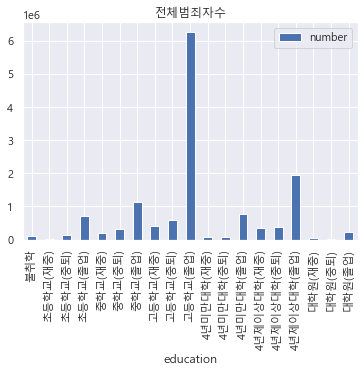

In [610]:
f=k[k.columns[5:]]
f2=f.astype(int)
f3=f2.sum().drop_duplicates()
dff=f3.to_frame()
dff.index.names=['education']
dff.rename(columns={0:'number'}, inplace=True)
dff.plot(kind='bar',title='전체범죄자수')

#### 고등학교(졸업) 범죄자 수가 계속 가장 많게 나오고 4년제 이상 대학을 졸업한 범죄자가 그 다음으로 많은 경향을 보여서 이것이 과연 학력에 따른 결과인지, 아니면 단순히 그 인구의 수가 많아서 나온 결과인지 궁금해졌다.

## 교육정도별 인구 수

In [612]:
#데이터 불러오기(2015년 인천광역시 자료)
edudata = pd.read_excel('교육정도별인구.xlsx')
edudata

,연령별(1),미취학,초등학교_재학,초등학교_중퇴,초등학교_졸업,중학교_재학,중학교_중퇴,중학교_졸업,고등학교_재학,고등학교_중퇴,고등학교_졸업,대학_재학,대학_중퇴,대학_졸업,대학교_재학,대학교_중퇴,대학교_졸업,대학원 이상_재학,대학원 이상_중퇴,대학원 이상_졸업
0,6~9세,21023,85432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10~14세,0,73205,0,2,63729,31,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15~19세,31,0,0,4,25754,211,653,101940,1264,13002,14097,318,0,20604,146,0,0,0,0
3,20~24세,84,0,0,3,3,213,983,48,1086,33971,29437,3388,28827,77999,2266,15819,1198,6,62
4,25~29세,126,0,0,3,2,184,1029,8,933,30524,2487,5459,42589,12476,4694,69392,4138,140,3595
5,30~34세,149,0,1,14,0,307,1617,25,1427,56413,912,5978,54352,2295,5337,72314,2408,384,7892
6,35~39세,128,0,0,12,1,439,1929,13,1804,79859,752,4481,49183,1219,4847,66034,1509,493,9382
7,40~44세,220,0,101,301,0,606,4187,11,1925,120881,545,2570,39655,1296,3233,55658,996,568,9158
8,45~49세,222,0,379,2734,0,878,10840,9,2417,140946,339,2305,28160,976,2872,47922,659,320,7481
9,50~54세,227,0,737,10433,0,1769,26342,6,2682,136887,2,2170,20270,325,2948,39315,426,187,6359


In [613]:
#데이터 편집
m=edudata.sum().to_frame()
mm=m.drop(m.index[0])
mm.index=['불취학','초등학교(재중)','초등학교(중퇴)','초등학교(졸업)','중학교(재중)','중학교(중퇴)','중학교(졸업)','고등학교(재중)','고등학교(중퇴)','고등학교(졸업)','4년미만대학(재중)','4년미만대학(중퇴)','4년미만대학(졸업)','4년제이상대학(재중)','4년제이상대학(중퇴)','4년제이상대학(졸업)','대학원(재중)','대학원(중퇴)','대학원(졸업)']
mm.index.names=['education']
mm.rename(columns={0:'number'}, inplace=True)

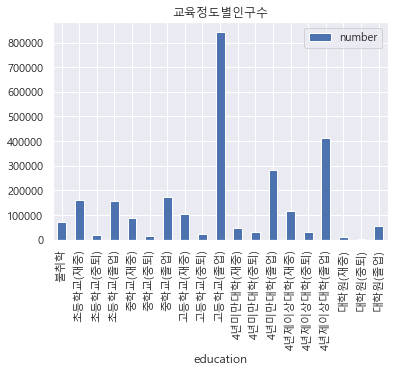

In [614]:
mm.plot(kind='bar',title='교육정도별인구수')

In [615]:
#2015년 인천의 인구수
mm.sum()

number    2638810.0
dtype: float64

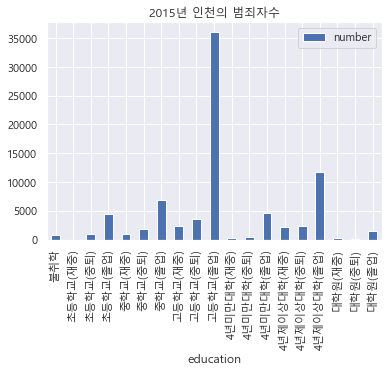

In [616]:
#2015년 데이터만 가져오기
kk=k[k['자료시점']=='2015년']
ff=kk[kk.columns[5:]]
ff2=ff.astype(int)
ff3=ff2.sum().drop_duplicates()
dfff=ff3.to_frame()
dfff.index.names=['education']
dfff.rename(columns={0:'number'}, inplace=True)

#지역별로 비슷하다고 가정해서 2015년 인천의 범죄자 수를 구해줌
new=dfff*(2638810/51010000)  #2015년 인천의 인구수/전국 인구수
new.plot(kind='bar',title='2015년 인천의 범죄자수')

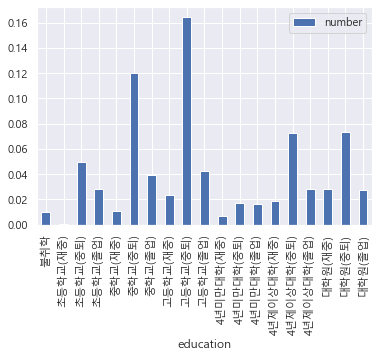

In [617]:
#교육정도별 인구수에서의 범죄자 비율
last=new/mm
last.plot(kind='bar')

## 결론

교육정도가 고등학교(졸업)인 범죄자 수가 많아서 과연 정말 교육정도의 영향인지 알아보기 위해 각 교육정도 집단별 범죄자 수의 비율을 알아본 결과 예상 외로 고등학교(중퇴)인 범죄자 수가 가장 많게 나왔다. 다음으로는 중학교(중퇴), 대학원(중퇴), 4년제 이상 대학(중퇴) 순서였는데, 이 결과에 따르면 중퇴자들 중에서 범죄자가 많다는 결론을 얻을 수 있다.